In [105]:
import pandas as pd

data = pd.read_csv('data/SMSSpamCollection.csv', header=None, names = ['label', 'text'], encoding='latin-1')
data

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [106]:
data_size = data['label'].value_counts()
data_size

ham     4825
spam     747
Name: label, dtype: int64

Balance dataset copying spam data

In [107]:
import random
ham_data = data[data['label'] == 'spam']
for i in range(0, data_size[0] - data_size[1]):
    n = random.randint(0, len(ham_data) - 1)
    random_ham = ham_data.iloc[n]
    data = data.append(random_ham)
    
data_size = data['label'].value_counts()
data_size

ham     4825
spam    4825
Name: label, dtype: int64

In [108]:
import re
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

data["char_count"] = data['text'].apply(len)
def count_words(string):
    return len(word_tokenize(string))
data["word_count"] = data['text'].apply(count_words)
def count_uppercase(string):
    return len(re.findall("[A-Z]", string))
data["uppercase_count"] = data['text'].apply(count_uppercase)
def count_punctuation(string):
    return len(re.findall("[^\w\s]", string))
data["punctuation_count"] = data['text'].apply(count_punctuation)
def count_digits(string):
    return len(re.findall("[0-9]", string))
data["digits_count"] = data['text'].apply(count_digits)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [109]:
numeric_data = data.drop("text", axis=1)
numeric_data

,label,char_count,word_count,uppercase_count,punctuation_count,digits_count
0,ham,111,24,3,9,0
1,ham,29,8,2,6,0
2,spam,155,37,10,6,25
3,ham,49,13,2,6,0
4,ham,61,15,2,2,0
...,...,...,...,...,...,...
3298,spam,157,29,3,2,22
250,spam,150,23,12,3,22
4877,spam,137,28,24,13,13
3360,spam,78,18,3,3,11


In [110]:
ham_data = data[data['label'] == 'ham']
spam_data = data[data['label'] == 'spam']

print('Statistics for ham')
print(ham_data.mean(axis='rows'))

print('\n\nStatistics for spam')
print(spam_data.mean(axis='rows'))

Statistics for ham
char_count           71.559378
word_count           17.409326
uppercase_count       4.099482
punctuation_count     3.961451
digits_count          0.305285
dtype: float64


Statistics for spam
char_count           139.529119
word_count            27.978860
uppercase_count       15.643731
punctuation_count      6.103420
digits_count          15.873575
dtype: float64


# Use multinomial Naïve Bayes classifier







<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Score: 0.9966846249481973
Training score: 0.9997236423932568
Test score: 0.9966846249481973
Accuracy: 0.9966846249481973
Precision per class: [1.         0.99344262]
Recall per class: [0.99333888 1.        ]
F1-score per class: [0.99665831 0.99671053]


<Figure size 432x288 with 0 Axes>

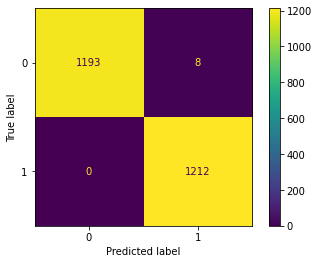







<class 'sklearn.naive_bayes.MultinomialNB'>
Score: 0.9129714048901783
Training score: 0.9191654000276358
Test score: 0.9129714048901783
Accuracy: 0.9129714048901783
Precision per class: [0.87911247 0.95298373]
Recall per class: [0.95670275 0.86963696]
F1-score per class: [0.91626794 0.90940466]


<Figure size 432x288 with 0 Axes>

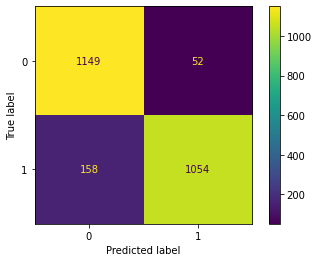

c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(








<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
Score: 0.951512639867385
Training score: 0.9584081801851596
Test score: 0.951512639867385
Accuracy: 0.951512639867385
Precision per class: [0.92812006 0.97733217]
Recall per class: [0.97835137 0.92491749]
F1-score per class: [0.95257398 0.95040271]


<Figure size 432x288 with 0 Axes>

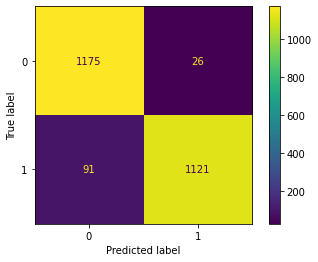

c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(








<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Score: 0.9809365934521342
Training score: 0.987978444106674
Test score: 0.9809365934521342
Accuracy: 0.9809365934521342
Precision per class: [0.98245614 0.97944079]
Recall per class: [0.97918401 0.98267327]
F1-score per class: [0.98081735 0.98105437]


c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Figure size 432x288 with 0 Axes>

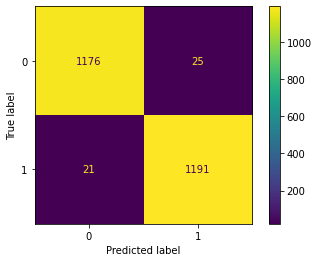







<class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>
Score: 0.951512639867385
Training score: 0.9629680806964211
Test score: 0.951512639867385
Accuracy: 0.951512639867385
Precision per class: [0.9234375  0.98323036]
Recall per class: [0.98417985 0.91914191]
F1-score per class: [0.9528416  0.95010661]


<Figure size 432x288 with 0 Axes>

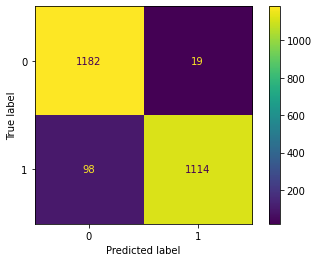

In [138]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np

clfs = [RandomForestClassifier(), MultinomialNB(), AdaBoostClassifier(), KNeighborsClassifier(), MLPClassifier()]

for clf in clfs:
    X = data.loc[:, (data.columns != 'label') & (data.columns != 'text')]
    y = data.loc[:, (data.columns == 'label') & (data.columns != 'text')]
    y = np.array(y).ravel()
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

    clf.fit(X_train, y_train)
    from sklearn.metrics import ConfusionMatrixDisplay
    import matplotlib.pyplot as plt
    from sklearn import metrics

    def compute_metrics(model):
        y_pred = model.predict(X_test)
        score = 0
        for output in zip(y_pred, y_test):
            score = (score + 1) if output[0] == output[1] else score
        score = score / len(y_test)
        print(f'\n\n\n\n\n\n{type(clf)}')
        print(f'Score: {score}')

        print(f'Training score: {model.score(X_train, y_train)}')
        print(f'Test score: {model.score(X_test, y_test)}')
        print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')
        print(f'Precision per class: {metrics.precision_score(y_test, y_pred, average = None)}')
        print(f'Recall per class: {metrics.recall_score(y_test, y_pred, average = None)}')
        print(f'F1-score per class: {metrics.f1_score(y_test, y_pred, average = None)}')
        plt.figure()
        confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
        disp.plot()
        plt.show()
    compute_metrics(clf)